# Extração e carregamento dos dados

In [58]:
# importação de bibliotecas
import pandas as pd

In [59]:
# Dataset armazenado no GitHub
url = 'https://raw.githubusercontent.com/liinedosanjos/Telecom---X---parte-2/refs/heads/main/telecom_tratado.csv'

In [60]:
# Carregando o CSV
df = pd.read_csv(url)

#visualização inicial
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,MonthlyCharges,TotalCharges,Contas_Diarias,Churn_num,num_servicos
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19,0,5
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00,0,4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46,1,3
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27,1,6
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80,1,4


In [61]:
print(df.columns)

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Contas_Diarias', 'Churn_num',
       'num_servicos'],
      dtype='object')



# Seleção das variáveis relevantes

In [62]:
# Definição das colunas a serem usadas no modelo
colunas_modelo = [
    'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
    'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod',
    'MonthlyCharges', 'TotalCharges', 'Contas_Diarias', 'num_servicos', 'Churn_num'
]

df_modelo = df[colunas_modelo]
df_modelo.head()


,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,MonthlyCharges,TotalCharges,Contas_Diarias,num_servicos,Churn_num
0,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,...,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19,5,0
1,Male,0,No,No,9,Yes,Yes,DSL,No,No,...,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00,4,0
2,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46,3,1
3,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27,6,1
4,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,...,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80,4,1


# Pré-processamento inicial

In [63]:
# Identificação variáveis categóricas (object)
cat_cols = df_modelo.select_dtypes(include=["object"]).columns
print("Variáveis categóricas:", cat_cols.tolist())

Variáveis categóricas: ['customer_gender', 'customer_Partner', 'customer_Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']


In [64]:
# Verificando os tipos das colunas
print(df_modelo.dtypes)

# Aplicando one-hot encoding
df_modelo = pd.get_dummies(df_modelo, drop_first=True)



customer_gender              object
customer_SeniorCitizen        int64
customer_Partner             object
customer_Dependents          object
tenure                        int64
PhoneService                 object
MultipleLines                object
InternetService              object
OnlineSecurity               object
OnlineBackup                 object
DeviceProtection             object
TechSupport                  object
StreamingTV                  object
StreamingMovies              object
account_Contract             object
account_PaperlessBilling     object
account_PaymentMethod        object
MonthlyCharges              float64
TotalCharges                float64
Contas_Diarias              float64
num_servicos                  int64
Churn_num                     int64
dtype: object


# Análise do balanceamento da variável alvo

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Proporção de classes usando a variável numérica (0 = Não churn, 1 = Churn)
proporcao = df_modelo['Churn_num'].value_counts(normalize=True) * 100

print("📊 Proporção de clientes por classe (%):")
print(proporcao.round(2))

📊 Proporção de clientes por classe (%):
Churn_num
0    73.46
1    26.54
Name: proportion, dtype: float64


 Resultado: existe um desequilíbrio moderado (maioria dos clientes não cancelou). Isso pode impactar o desempenho dos modelos.

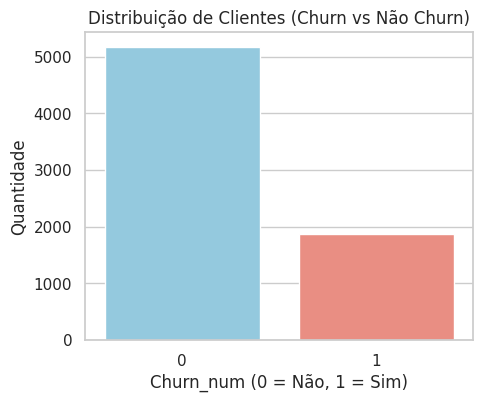

In [66]:
# Visualização da distribuição
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.countplot(x="Churn_num", data=df_modelo, hue="Churn_num",
              palette=["skyblue","salmon"], legend=False)
plt.title("Distribuição de Clientes (Churn vs Não Churn)")
plt.ylabel("Quantidade")
plt.xlabel("Churn_num (0 = Não, 1 = Sim)")
plt.show()




# Análise da correlação

Correlação das variáveis com Churn_num:
Churn_num                                        1.00
InternetService_Fiber optic                      0.31
account_PaymentMethod_Electronic check           0.30
Contas_Diarias                                   0.19
MonthlyCharges                                   0.19
account_PaperlessBilling_Yes                     0.19
customer_SeniorCitizen                           0.15
StreamingTV_Yes                                  0.06
StreamingMovies_Yes                              0.06
MultipleLines_Yes                                0.04
PhoneService_Yes                                 0.01
customer_gender_Male                            -0.01
MultipleLines_No phone service                  -0.01
num_servicos                                    -0.02
DeviceProtection_Yes                            -0.07
OnlineBackup_Yes                                -0.08
account_PaymentMethod_Mailed check              -0.09
account_PaymentMethod_Credit card (automat

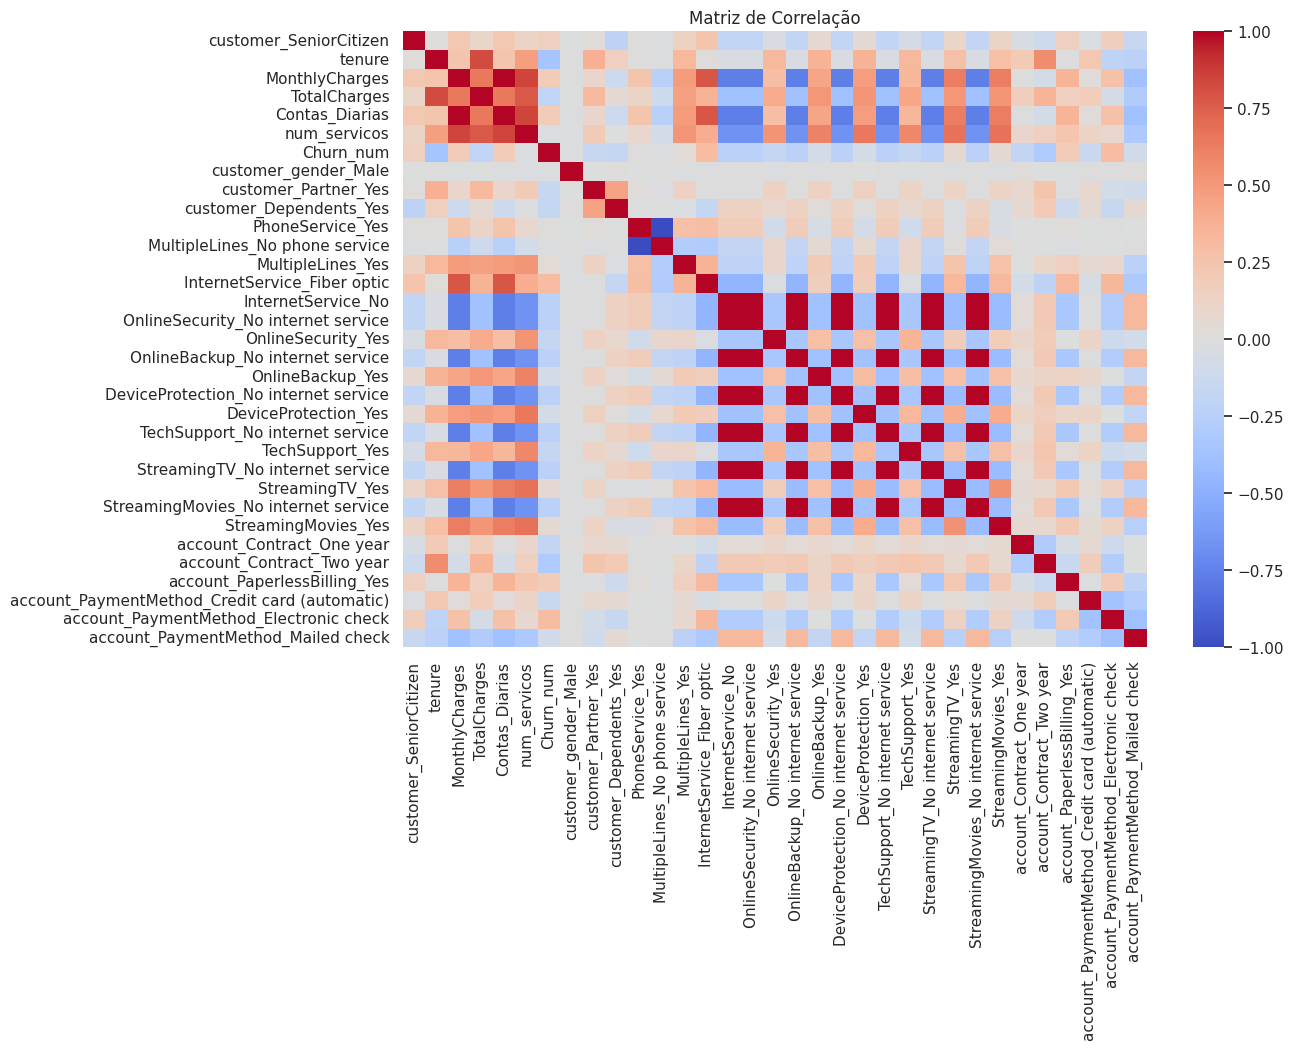

In [67]:
# Matriz de correlação entre variáveis numéricas
corr = df_modelo.corr()

# Correlação com a variável alvo (Churn_num)
corr_churn = corr["Churn_num"].sort_values(ascending=False)

print("Correlação das variáveis com Churn_num:")
print(corr_churn.round(2))

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False, cbar=True)
plt.title("Matriz de Correlação")
plt.show()


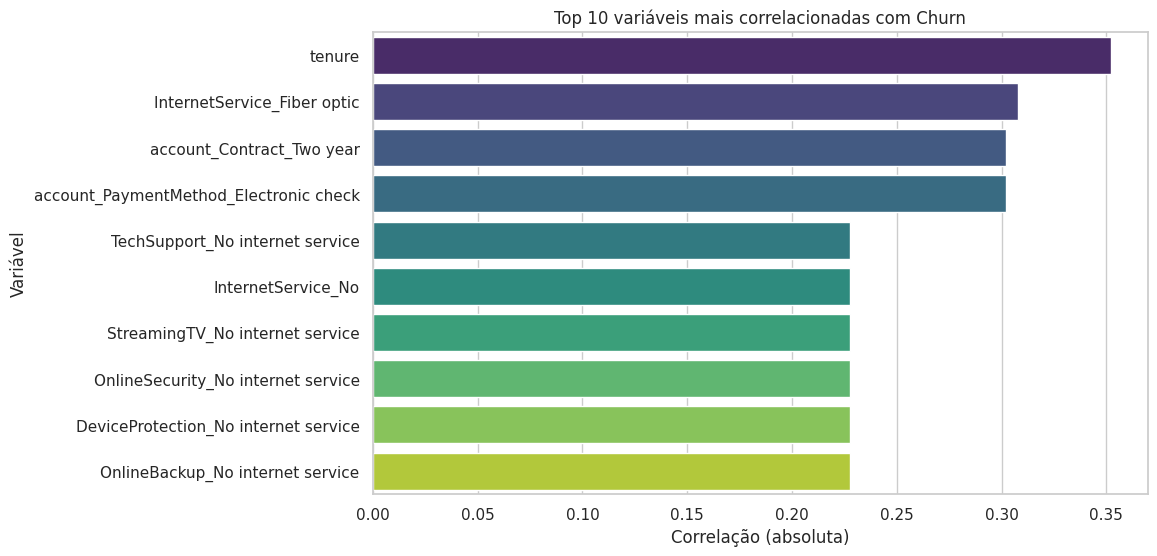

In [68]:
# Top 10 variáveis mais correlacionadas (positivas ou negativas)
top_corr = corr_churn.abs().sort_values(ascending=False).head(11).drop("Churn_num")

# Gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(
    x=top_corr.values,
    y=top_corr.index,
    palette="viridis",
    hue=top_corr.index,
    legend=False
)
plt.title("Top 10 variáveis mais correlacionadas com Churn")
plt.xlabel("Correlação (absoluta)")
plt.ylabel("Variável")
plt.show()


# Padronização e preparação dos dados

In [69]:
from sklearn.preprocessing import StandardScaler

# Variável alvo
y = df_modelo['Churn_num']

# Seleção de variáveis numéricas
num_vars = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Contas_Diarias', 'num_servicos']

# Seleção de variáveis categóricas
cat_vars = df_modelo.drop(columns=num_vars + ['Churn_num']).columns.tolist()

# One-Hot Encoding já aplicado, agora padronizar variáveis numéricas
df_cat = pd.get_dummies(df_modelo[cat_vars], drop_first=True)

# Padronizar variáveis numéricas
scaler = StandardScaler()
df_num = pd.DataFrame(scaler.fit_transform(df_modelo[num_vars]), columns=num_vars)

# Concatenar dados numéricos e categóricos
X = pd.concat([df_num, df_cat], axis=1)

print("Dimensões do dataset pronto para ML:", X.shape)
X.head()


Dimensões do dataset pronto para ML: (7043, 32)


,tenure,MonthlyCharges,TotalCharges,Contas_Diarias,num_servicos,customer_SeniorCitizen,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,-0.951682,0.027862,-0.744026,0.031231,0.369183,0,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,-0.951682,-0.161583,-0.766482,-0.158198,-0.063239,0,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,-1.155283,0.303720,-0.881874,0.300419,-0.495661,0,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,-0.788800,1.104706,-0.459662,1.107982,0.801605,1,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,-1.196004,0.636080,-0.887808,0.639396,-0.063239,1,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


# Análise direcionada (boxplots e scatterplots)


**Variáveis numéricas vs Churn**

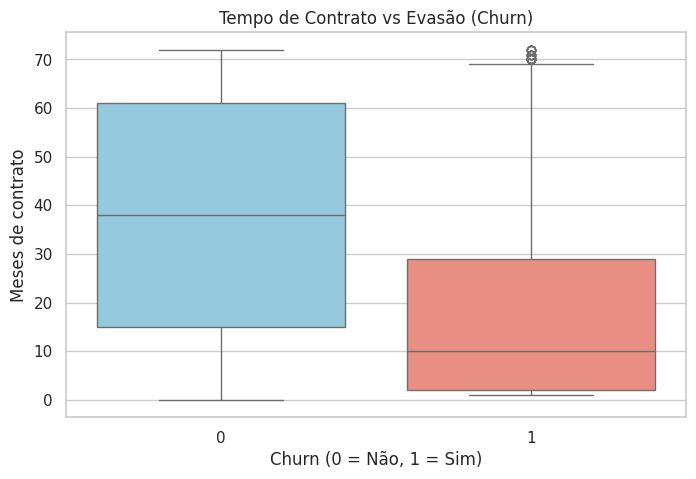

📊 Estatísticas de tenure por Churn:
            count   mean    std  min   25%   50%   75%   max
Churn_num                                                   
0          5174.0  37.57  24.11  0.0  15.0  38.0  61.0  72.0
1          1869.0  17.98  19.53  1.0   2.0  10.0  29.0  72.0


In [70]:
# Boxplot contrato vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Churn_num",
    y="tenure",
    data=df_modelo,
    hue="Churn_num",
    palette={0:"skyblue", 1:"salmon"},
    legend=False
)
plt.title("Tempo de Contrato vs Evasão (Churn)")
plt.xlabel("Churn (0 = Não, 1 = Sim)")
plt.ylabel("Meses de contrato")
plt.show()

print("📊 Estatísticas de tenure por Churn:")
print(df_modelo.groupby("Churn_num")["tenure"].describe().round(2))


 Clientes que evadiram têm contratos mais curtos.

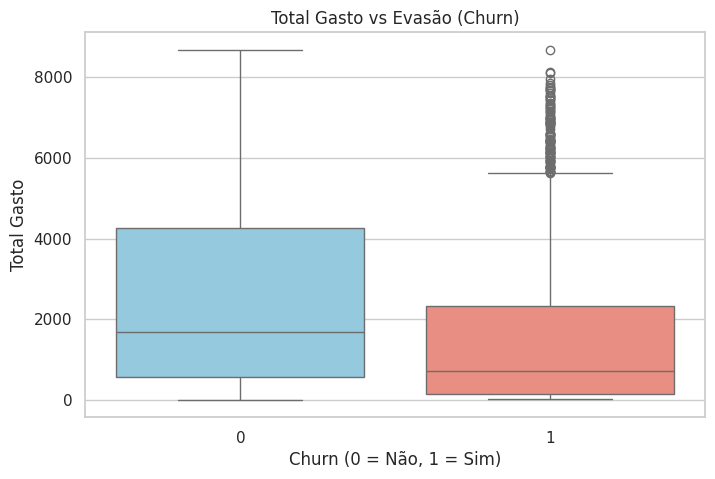


📊 Estatísticas de TotalCharges por Churn:
            count     mean      std    min    25%      50%      75%      max
Churn_num                                                                   
0          5174.0  2549.91  2329.95   0.00  572.9  1679.52  4262.85  8672.45
1          1869.0  1531.80  1890.82  18.85  134.5   703.55  2331.30  8684.80


In [71]:
# Boxplot TotalCharges x churn
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Churn_num",
    y="TotalCharges",
    data=df_modelo,
    hue="Churn_num",
    palette={0:"skyblue", 1:"salmon"},
    legend=False
)
plt.title("Total Gasto vs Evasão (Churn)")
plt.xlabel("Churn (0 = Não, 1 = Sim)")
plt.ylabel("Total Gasto")
plt.show()

print("\n📊 Estatísticas de TotalCharges por Churn:")
print(df_modelo.groupby("Churn_num")["TotalCharges"].describe().round(2))

 Clientes que evadiram gastaram menos em média.

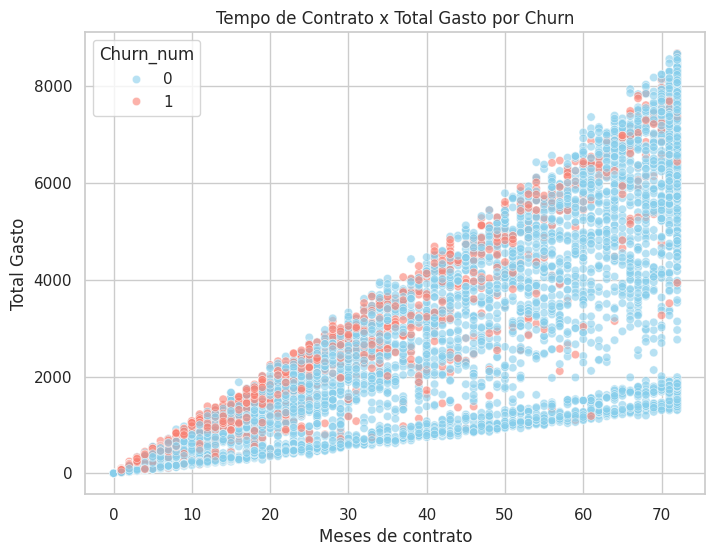

In [72]:
#Scatter tenure x TotalCharges
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="tenure",
    y="TotalCharges",
    hue="Churn_num",
    data=df_modelo,
    palette={0:"skyblue", 1:"salmon"},
    alpha=0.6
)
plt.title("Tempo de Contrato x Total Gasto por Churn")
plt.xlabel("Meses de contrato")
plt.ylabel("Total Gasto")
plt.show()


 Clientes fiéis tendem a gastar mais ao longo do tempo.

# Análise detalhada de variáveis numéricas e categóricas

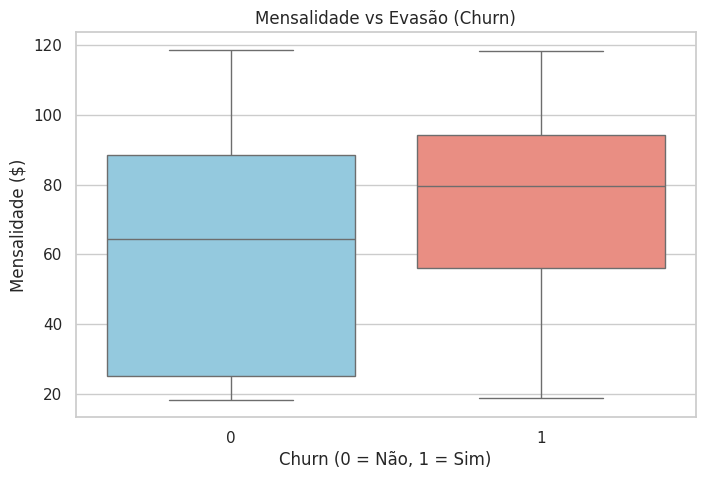

📊 Estatísticas de MonthlyCharges por Churn:
            count   mean    std    min    25%    50%   75%     max
Churn_num                                                         
0          5174.0  61.27  31.09  18.25  25.10  64.43  88.4  118.75
1          1869.0  74.44  24.67  18.85  56.15  79.65  94.2  118.35


In [73]:
#Boxplot: Mensalidade vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df_modelo, x="Churn_num", y="MonthlyCharges", hue="Churn_num",
            palette=["skyblue","salmon"], legend=False)
plt.title("Mensalidade vs Evasão (Churn)")
plt.xlabel("Churn (0 = Não, 1 = Sim)")
plt.ylabel("Mensalidade ($)")
plt.show()

print("📊 Estatísticas de MonthlyCharges por Churn:")
print(df_modelo.groupby("Churn_num")["MonthlyCharges"].describe().round(2))

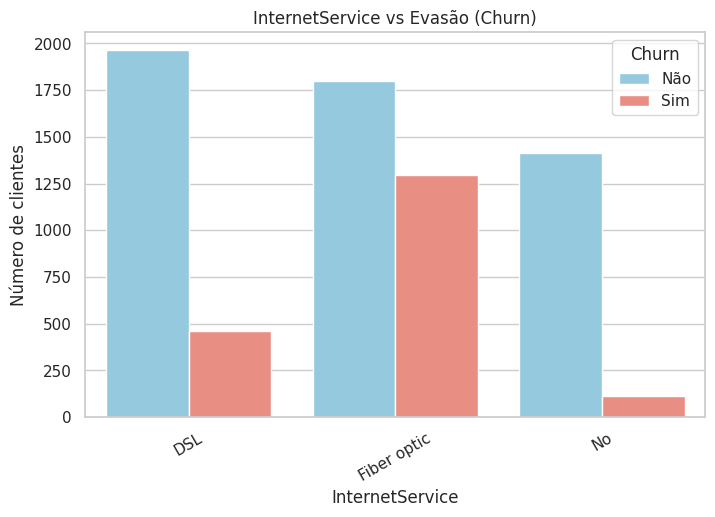

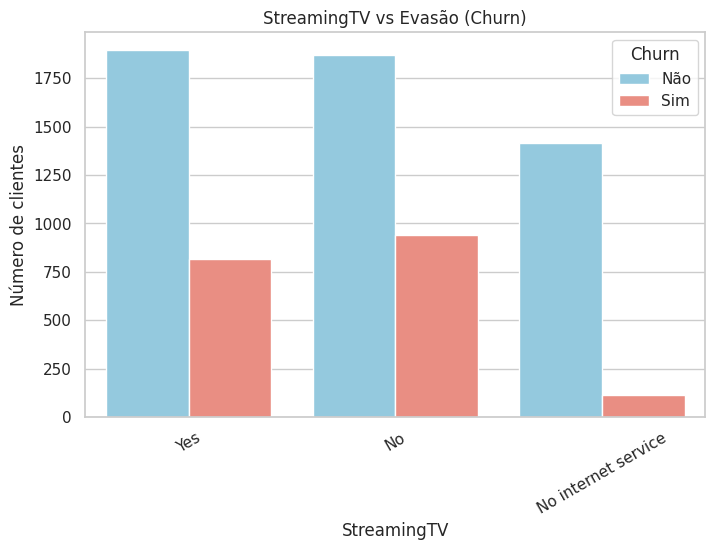

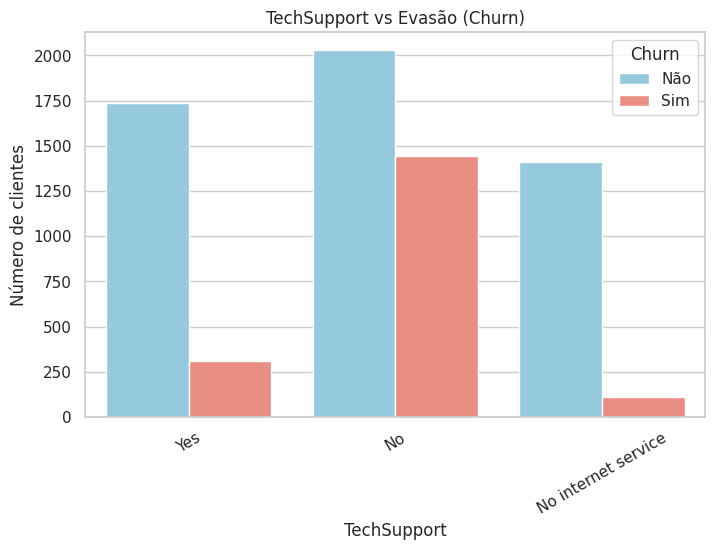

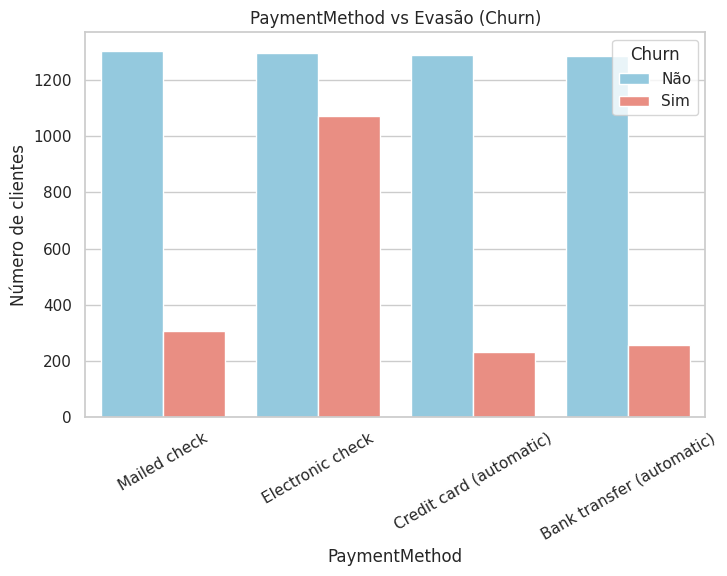

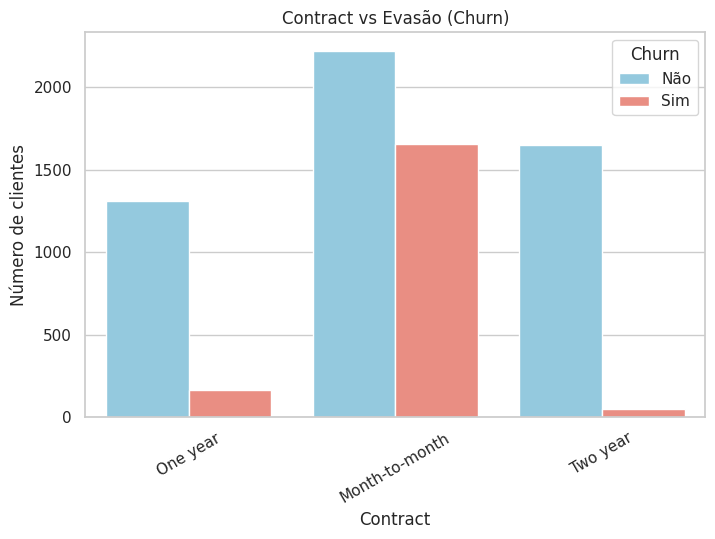

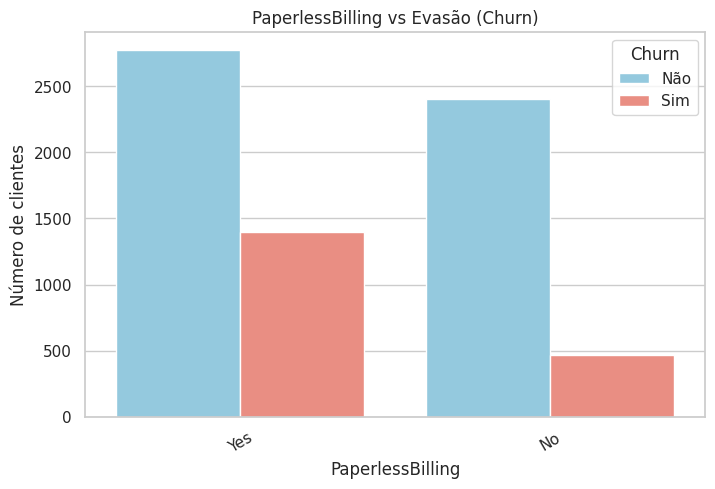

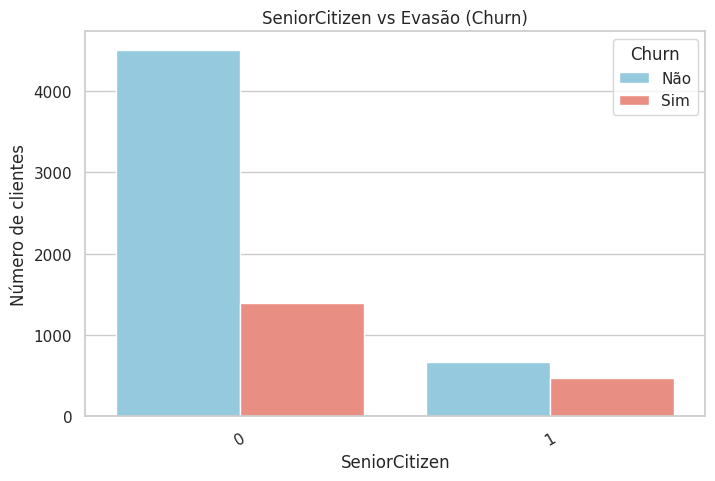

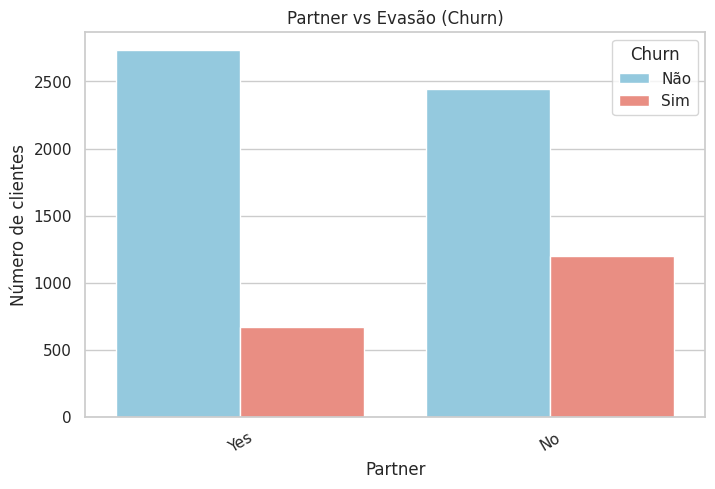

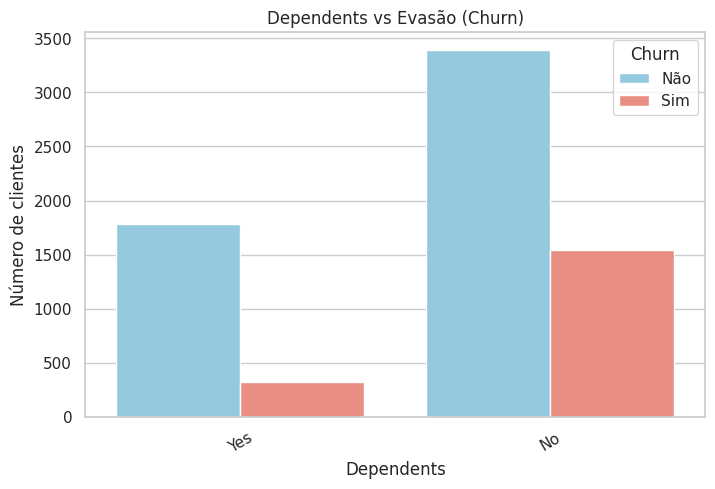

In [75]:
# Reconstruir colunas categóricas originais

# Recriar as colunas originais para visualização
df_modelo['InternetService_orig'] = df[['InternetService']]
df_modelo['StreamingTV_orig'] = df[['StreamingTV']]
df_modelo['TechSupport_orig'] = df[['TechSupport']]
df_modelo['PaymentMethod_orig'] = df[['account_PaymentMethod']]
df_modelo['Contract_orig'] = df[['account_Contract']]
df_modelo['PaperlessBilling_orig'] = df[['account_PaperlessBilling']]
df_modelo['SeniorCitizen_orig'] = df[['customer_SeniorCitizen']]
df_modelo['Partner_orig'] = df[['customer_Partner']]
df_modelo['Dependents_orig'] = df[['customer_Dependents']]

# Countplots

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
cores = {0: "skyblue", 1: "salmon"}

# Lista de variáveis categóricas originais para plot
cat_vars_plot = [
    "InternetService_orig",
    "StreamingTV_orig",
    "TechSupport_orig",
    "PaymentMethod_orig",
    "Contract_orig",
    "PaperlessBilling_orig",
    "SeniorCitizen_orig",
    "Partner_orig",
    "Dependents_orig"
]

for var in cat_vars_plot:
    plt.figure(figsize=(8,5))
    sns.countplot(x=var, hue="Churn_num", data=df_modelo, palette=cores)
    plt.title(f"{var.replace('_orig','')} vs Evasão (Churn)")
    plt.xlabel(var.replace('_orig',''))
    plt.ylabel("Número de clientes")
    plt.legend(title="Churn", labels=["Não","Sim"])
    plt.xticks(rotation=30)
    plt.show()



# Modelagem preditiva
Separação de dados

In [76]:
from sklearn.model_selection import train_test_split

# Divisão treino/teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Verificar tamanhos dos datasets
print(f"Tamanho X_train: {X_train.shape}")
print(f"Tamanho X_test:  {X_test.shape}")
print(f"Tamanho y_train: {y_train.shape}")
print(f"Tamanho y_test:  {y_test.shape}")


Tamanho X_train: (4930, 32)
Tamanho X_test:  (2113, 32)
Tamanho y_train: (4930,)
Tamanho y_test:  (2113,)


Separação de dados

**Regressão Logística (Logistic Regression)**

Tipo: modelo baseado em função linear e distância.

Necessita normalização, pois as features com escalas diferentes podem influenciar nos coeficientes e na convergência do algoritmo.

Justificativa: é um modelo interpretável, fornece probabilidades de churn e é um bom baseline para classificação binária.

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Regressão Logística (com dados padronizados)
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("=== Regressão Logística ===")
print("Acurácia:", round(accuracy_score(y_test, y_pred_log), 3))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_log))


=== Regressão Logística ===
Acurácia: 0.798
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113

Matriz de Confusão:
 [[1380  172]
 [ 254  307]]


**Random Forest**

Tipo: modelo baseado em árvores (ensemble de Decision Trees).

Não necessita normalização, árvores não são sensíveis à escala das features.

Justificativa: consegue capturar relações não lineares e interações complexas entre variáveis, além de lidar bem com features categóricas e numéricas sem necessidade de pré-processamento de escala.

In [79]:
# Random Forest (não precisa normalização)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print("Acurácia:", round(accuracy_score(y_test, y_pred_rf), 3))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_rf))

=== Random Forest ===
Acurácia: 0.786
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.49      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.77      0.79      0.78      2113

Matriz de Confusão:
 [[1384  168]
 [ 285  276]]


**Avaliação dos modelos**

Métricas no conjunto de teste

| Modelo              |  Accuracy | Precisão (churn=1) | Recall (churn=1) | F1 (churn=1) |
| ------------------- | :-------: | :----------------: | :--------------: | :----------: |
| Regressão Logística | **0,798** |        0,64        |     **0,55**     |   **0,59**   |
| Random Forest       |   0,786   |        0,62        |       0,49       |     0,55     |


***Matrizes de confusão***

*  **Regressão Logística**


[[1380  172]
[ 254  307]]


*    172 FPs | 254 FNs

*  **Random Forest**

[[1384  168]
 [ 285  276]]

 *  168 FPs | 285 FNs




Foram aplicados dois modelos de Machine Learning para previsão da evasão de clientes:

Regressão Logística (com normalização)

Random Forest (sem necessidade de normalização)

🔹 Regressão Logística

Acurácia: 0.798

Precisão (classe 1 - evasão): 0.64

Recall (classe 1 - evasão): 0.55

F1-score (classe 1 - evasão): 0.59

Matriz de Confusão:

Verdadeiros Negativos: 1380

Falsos Positivos: 172

Falsos Negativos: 254

Verdadeiros Positivos: 307

📌 Análise:
A Regressão Logística apresentou boa capacidade de generalização, com acurácia de quase 80%. Entretanto, observou-se maior dificuldade em identificar corretamente os clientes que irão evadir (classe 1), já que o recall foi de apenas 0.55. Isso indica que parte dos clientes propensos a sair não foi identificada.

🔹 Random Forest

Acurácia: 0.786

Precisão (classe 1 - evasão): 0.62

Recall (classe 1 - evasão): 0.49

F1-score (classe 1 - evasão): 0.55

Matriz de Confusão:

Verdadeiros Negativos: 1384

Falsos Positivos: 168

Falsos Negativos: 285

Verdadeiros Positivos: 276

📌 Análise:
O Random Forest apresentou desempenho semelhante à Regressão Logística, mas com recall ainda menor (0.49), o que significa que deixou de identificar uma quantidade ainda maior de clientes que evadiriam.


###Comparação Crítica dos Modelos

Ambos os modelos tiveram bom desempenho geral, com acurácia próxima de 80%.

A Regressão Logística se destacou levemente, principalmente no equilíbrio entre precisão e recall.

Nenhum modelo apresentou sinais evidentes de overfitting (desempenho consistente), mas o recall relativamente baixo em ambos indica uma tendência a underfitting: os modelos ainda não capturam completamente os padrões de evasão.

### **Melhorias imediatas sugeridas**
Regressão Logística: incluir mais variáveis, ajustar regularização.

Random Forest: aumentar número de árvores, ajustar profundidade máxima e balanceamento de classes.

Testar outros algoritmos como XGBoost, LightGBM ou SVM para capturar relações mais complexas.

# Interpretações e conclusões

### **Análise de importância das variáveis**
**Regressão Logística:**

📌 Regressão Logística (coeficientes):
Destacaram-se como fatores associados ao risco de evasão:

MonthlyCharges (valor da mensalidade): valores altos aumentam risco de saída.

Contract (tipo de contrato): contratos mensais têm maior risco de evasão.

PaymentMethod (método de pagamento): cheque eletrônico e fatura digital (sem papel) associados a maior evasão.

Serviços adicionais (OnlineSecurity e TechSupport): ausência aumenta probabilidade de saída.

Tenure e TotalCharges: quanto maiores, menor o risco de evasão (clientes fidelizados).

📌 Random Forest (importância das variáveis):
O modelo destacou as mesmas variáveis como mais relevantes:

Tenure e TotalCharges → fidelização.

MonthlyCharges → impacto direto na insatisfação.

Contract e PaymentMethod → diferenciação clara de perfis de risco.

OnlineSecurity e TechSupport → ausência relacionada à evasão.

**Principais fatores de evasão**

📌 Risco maior de evasão quando:

O valor da mensalidade (MonthlyCharges) é elevado;

O cliente possui contrato mensal;

A fatura é enviada em formato digital (sem papel);

O método de pagamento é via cheque eletrônico;

O cliente não possui serviços adicionais, como Segurança Online (OnlineSecurity) e Suporte Técnico (TechSupport).

📌 Risco menor de evasão quando:

O tempo de permanência (Tenure) na empresa é alto;

O valor acumulado ao longo da relação (TotalCharges) é elevado, indicando fidelização;

O cliente possui contratos de 1 ou 2 anos, que geram maior compromisso e estabilidade.


**Análise Complementar sobre Faturamento e Pagamento**

Pagamento por cheque eletrônico e fatura digital (sem papel) aparecem associados à evasão em várias bases de telecom.

Em conjunto, esses fatores podem refletir perfis de clientes mais sensíveis a preço ou que tiveram experiências negativas de cobrança, gerando percepção de atrito e insatisfação.

# Conclusão geral

Os modelos confirmam que a evasão de clientes não é aleatória: ela está fortemente associada a perfil de pagamento, tipo de contrato e serviços adicionais contratados.

📌 Estratégias de retenção sugeridas:

**Planos de fidelização:** incentivar contratos anuais ou bienais com benefícios progressivos.

**Política de preços diferenciada:** oferecer descontos ou pacotes customizados para clientes com mensalidades altas.

**Serviços adicionais como diferencial:** promover adesão a OnlineSecurity e TechSupport como forma de aumentar valor percebido.

**Melhoria na experiência de cobrança:** revisar comunicação e praticidade do faturamento digital e do pagamento via cheque eletrônico.

**Programa de engajamento:** oferecer vantagens adicionais para clientes com longo tempo de casa, reforçando a fidelidade.

👉 Assim, a Regressão Logística se mostrou ligeiramente superior ao Random Forest, mas ambos reforçam os mesmos fatores de risco e proteção contra a evasão.
A empresa pode agir diretamente sobre contratos, preços, métodos de pagamento e serviços adicionais para reduzir o churn e aumentar a fidelização*